In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Importing the dataset
dataset = pd.read_csv('data (3).csv', sep = '|')
X = dataset.drop(['Name', 'md5', 'legitimate'], axis = 1).values
y = dataset['legitimate'].values

# Tree-based feature selection:
from sklearn.feature_selection import SelectFromModel
import sklearn.ensemble as ske
fsel = ske.ExtraTreesClassifier().fit(X, y)#transforms to importance value

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10539 entries, 0 to 10538
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         10539 non-null  object 
 1   md5                          10539 non-null  object 
 2   Machine                      10539 non-null  int64  
 3   SizeOfOptionalHeader         10539 non-null  int64  
 4   Characteristics              10539 non-null  int64  
 5   MajorLinkerVersion           10539 non-null  int64  
 6   MinorLinkerVersion           10539 non-null  int64  
 7   SizeOfCode                   10539 non-null  int64  
 8   SizeOfInitializedData        10539 non-null  int64  
 9   SizeOfUninitializedData      10539 non-null  int64  
 10  AddressOfEntryPoint          10539 non-null  int64  
 11  BaseOfCode                   10539 non-null  int64  
 12  BaseOfData                   10539 non-null  int64  
 13  ImageBase       

In [4]:
dataset.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,10539.000000,10539.000000,10539.000000,10539.000000,10539.000000,1.053900e+04,1.053900e+04,1.053900e+04,1.053900e+04,1.053900e+04,...,10539.000000,10539.000000,10539.000000,10539.000000,1.053900e+04,10539.000000,1.053900e+04,1.053900e+04,10539.000000,10539.000000
mean,10897.261979,228.981118,6690.892115,11.002277,8.951513,1.318032e+06,1.048309e+06,2.818828e+05,3.815470e+05,5.756487e+04,...,19.825505,3.720452,2.245625,5.488690,2.555231e+04,280.169845,2.383246e+05,1.517926e+05,11.036057,0.335895
std,15760.025794,7.525192,10279.733735,7.423987,11.159629,3.752865e+07,2.655705e+07,1.527909e+07,1.774100e+06,9.568175e+05,...,82.190732,1.015392,1.145585,1.895338,1.150441e+05,1631.936775,1.311310e+06,1.557227e+07,7.295529,0.472325
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,6.000000,0.000000,4.300800e+04,3.993600e+04,0.000000e+00,1.286000e+04,4.096000e+03,...,2.000000,3.352950,1.569330,3.661073,8.744286e+02,20.000000,9.840000e+02,0.000000e+00,0.000000,0.000000
50%,332.000000,224.000000,271.000000,14.000000,11.000000,1.658880e+05,1.628160e+05,0.000000e+00,7.164400e+04,4.096000e+03,...,6.000000,3.667685,2.434955,5.214816,2.196800e+03,104.000000,9.640000e+03,9.200000e+01,16.000000,0.000000
75%,34404.000000,240.000000,8226.000000,14.000000,12.000000,4.003840e+05,8.668160e+05,0.000000e+00,2.012160e+05,4.096000e+03,...,19.000000,4.193130,3.012886,7.544784,1.242508e+04,240.000000,8.246400e+04,2.560000e+02,16.000000,1.000000
max,34404.000000,328.000000,41358.000000,127.000000,165.000000,1.766614e+09,1.918989e+09,1.070112e+09,6.673171e+07,6.203392e+07,...,4385.000000,7.998279,7.998279,7.999994,6.189540e+06,89912.000000,6.003751e+07,1.598644e+09,21.000000,1.000000


In [5]:
dataset.isnull().sum()

Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeap

In [6]:
X.shape

(10539, 54)

In [7]:
model = SelectFromModel(fsel, prefit=True)
X_new = model.transform(X)#considers important features
nb_features = X_new.shape[1]
nb_features
    

10

In [8]:
X_new.shape[1]

10

In [9]:
fsel.feature_importances_

array([2.72758074e-01, 7.19738350e-02, 2.13925362e-02, 1.24937601e-02,
       1.07840466e-02, 5.06497913e-03, 2.77180029e-03, 1.33484635e-03,
       6.77779556e-03, 8.23850382e-04, 2.86810050e-03, 1.09783150e-02,
       1.92655489e-03, 5.44377482e-03, 1.25682570e-01, 7.02168553e-03,
       8.59902626e-03, 1.94555873e-03, 1.21753536e-01, 9.56939697e-03,
       2.57403457e-03, 3.29181537e-03, 4.80885543e-03, 6.67233330e-03,
       5.61280133e-02, 4.72779412e-03, 2.88037487e-03, 1.11322082e-03,
       3.08024766e-04, 6.53322814e-06, 4.28910222e-05, 4.06290343e-03,
       1.21609117e-02, 7.34697600e-03, 8.97043324e-03, 3.51422494e-03,
       2.16956840e-03, 3.54058498e-03, 3.22585257e-03, 2.69486225e-03,
       2.96807561e-03, 2.22522906e-02, 4.52765340e-03, 1.82638436e-03,
       6.34519749e-04, 4.52240286e-03, 1.33207649e-02, 1.27190013e-02,
       3.09886826e-02, 3.39324857e-03, 4.45020695e-03, 2.75118865e-03,
       2.07346732e-02, 4.27066559e-02])

In [12]:
#fsel.feature_importances_[::-1][:nb_features]

array([0.04270666, 0.02073467, 0.00275119, 0.00445021, 0.00339325,
       0.03098868, 0.012719  , 0.01332076, 0.0045224 , 0.00063452])

In [13]:
np.argsort(fsel.feature_importances_)[::-1][:nb_features]

array([ 0, 14, 18,  1, 24, 53, 48, 41,  2, 52], dtype=int64)

In [15]:
dataset.columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [14]:
indices = np.argsort(fsel.feature_importances_)[::-1][:nb_features]
indices

array([ 0, 14, 18,  1, 24, 53, 48, 41,  2, 52], dtype=int64)

In [17]:
feature_imp=[]
features = [] #feature importances are printed along with feature names
for f in range(nb_features):
    print("%d. feature %s (%f)" % (f + 1, dataset.columns[2+indices[f]], fsel.feature_importances_[indices[f]]))
    feature_imp.append(fsel.feature_importances_[indices[f]])
    features.append(dataset.columns[2+f])

    

1. feature Machine (0.272758)
2. feature MajorOperatingSystemVersion (0.125683)
3. feature MajorSubsystemVersion (0.121754)
4. feature SizeOfOptionalHeader (0.071974)
5. feature DllCharacteristics (0.056128)
6. feature VersionInformationSize (0.042707)
7. feature ResourcesMaxEntropy (0.030989)
8. feature ImportsNbDLL (0.022252)
9. feature Characteristics (0.021393)
10. feature LoadConfigurationSize (0.020735)


In [18]:
(indices)

array([ 0, 14, 18,  1, 24, 53, 48, 41,  2, 52], dtype=int64)

In [19]:
features

['Machine',
 'SizeOfOptionalHeader',
 'Characteristics',
 'MajorLinkerVersion',
 'MinorLinkerVersion',
 'SizeOfCode',
 'SizeOfInitializedData',
 'SizeOfUninitializedData',
 'AddressOfEntryPoint',
 'BaseOfCode']

In [20]:
feature_imp

[0.27275807412822395,
 0.12568257032081706,
 0.1217535362323136,
 0.07197383504749211,
 0.05612801326501538,
 0.042706655937948694,
 0.03098868257626805,
 0.022252290587580555,
 0.02139253615391498,
 0.020734673234627975]

In [21]:
print(len(feature_imp))
print(len(features))

10
10


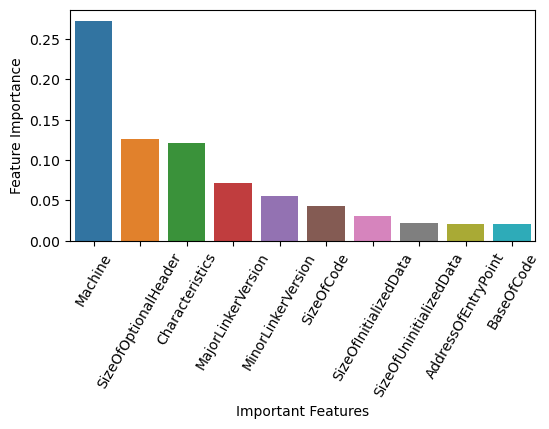

In [25]:
import seaborn as sns
plt.figure(figsize=(6,3))
barplt=sns.barplot(x=features,y=feature_imp)
plt.xlabel('Important Features')
plt.ylabel('Feature Importance')
for item in barplt.get_xticklabels():
    item.set_rotation(60)
plt.show()

In [30]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 0)

In [31]:
dataset.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,Windows.Internal.Shell.Broker.dll,09e83f1d1c99ad33009dbe6fb129c2d9,34404,240,8226,14,12,779776,253952,0,...,2,3.072050,2.706833,3.437268,604.000000,200,1008,256,16,1
1,hidserv.dll,3030f19c6a73367d6d5eedd157f5d01a,34404,240,8226,14,12,21504,13312,0,...,3,3.056204,2.709457,3.465499,515.333333,200,932,256,16,1
2,DmApiSetExtImplDesktop.dll,8271846f8f5dd1cfddaa957b1b9da1a2,34404,240,8226,14,12,33792,27648,0,...,1,3.466474,3.466474,3.466474,980.000000,980,980,256,16,1
3,FSResizerSetup27.exe,5802b4215566bb9593a736e945a28e99,332,224,271,6,0,23552,164864,1024,...,9,3.032143,1.971335,5.102472,363.444444,34,744,0,0,1
4,asc-setup.exe,8cb1fb45489d065720285deeccbacd98,332,224,33167,2,25,87040,71680,0,...,19,4.402265,2.699131,6.600332,3275.473684,16,33512,0,15,1


In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred[:10]

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [35]:
X_test.shape

(2108, 10)

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1377,   40],
       [  26,  665]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth')

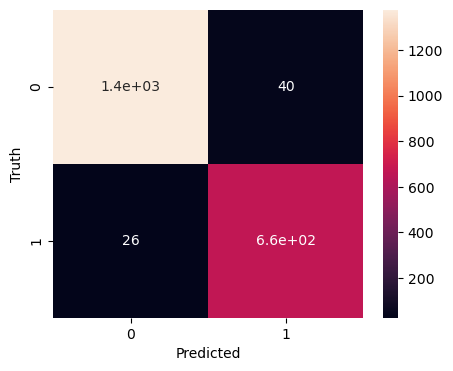

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,4))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [38]:
from sklearn.metrics import accuracy_score
acc_knn = accuracy_score(y_test,y_pred)#(actual,predicted)
acc_knn

0.9686907020872866

In [39]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy')
classifier.fit(X_train, y_train)

#predict the test results
y_pred = classifier.predict(X_test)
y_pred[:10]

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [40]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1397,   20],
       [  19,  672]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth')

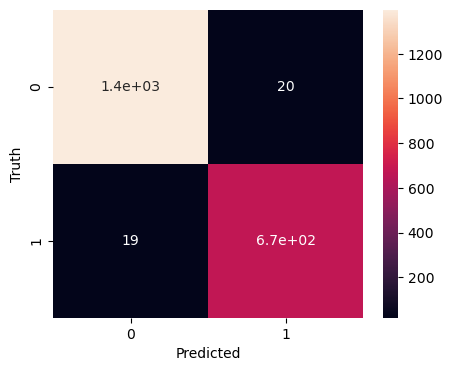

In [41]:
plt.figure(figsize=(5,4))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
acc_rfc = accuracy_score(y_test,y_pred)
acc_rfc

0.9814990512333965

In [48]:
from xgboost import XGBClassifier
classifier = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=50)
classifier.fit(X_train, y_train)

#predict the test results
y_pred = classifier.predict(X_test)
y_pred[:10]

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1])

In [49]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1401,   16],
       [  22,  669]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth')

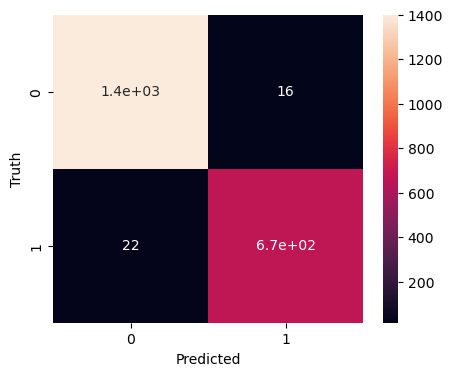

In [50]:
plt.figure(figsize=(5,4))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
acc_xgb = accuracy_score(y_test,y_pred)
acc_xgb

0.9819734345351043

In [52]:
!pip install lightgbm
import lightgbm as lgbm
model = lgbm.LGBMClassifier(boosting_type='gbdt',
                           n_jobs=-1)

In [53]:
model.fit(X_train, y_train)



LGBMClassifier()

In [54]:
#predict the test results
y_pred = model.predict(X_test)
y_pred[:10]

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [55]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1398,   19],
       [  22,  669]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth')

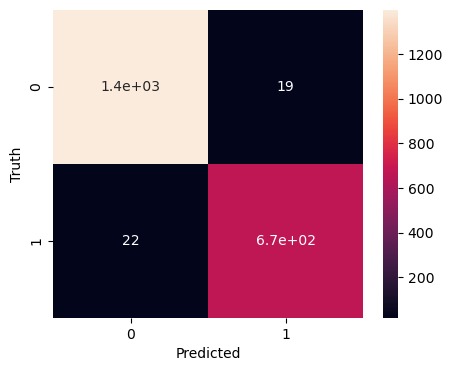

In [56]:
plt.figure(figsize=(5,4))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [57]:
acc_lgb = accuracy_score(y_test,y_pred)
acc_lgb

0.9805502846299811

In [58]:
from sklearn.svm import SVC


In [61]:
clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9558823529411765
